# CO2 Emissions Data Analysis and Regression

#### Problem description and objective

- We will be working with a vehicle dataset containing 16 vehicle classes, 42 different makes, and over 2000 different models.

- Our first objective is to conduct an exploratory data analysis so we can better understand our data and also identify interesting trends and statistics about these classes, makes, and models.

- Next, we want to identify which features of a car correlate most strongly with its CO2 emissions. Then we will run a linear regression model to see how well the model predicts a car's emissions based on those features. 


#### Summary of findings from the data analysis:

- The most popular vehicle models are the Ford F-150 followed by the Ford Mustang.
- The most popular vehicle makes are Ford, Chevrolet, and BMW.
- The most popular vehicle classes are small SUVs and mid-size sedans.
- Car makes with the least CO2 emissions are Smart, Honda, and Fiat.
- Car makes with the most CO2 emissions are Bugatti, Rolls-Royce, (Dodge) SRT, and Lamborghini.
- Vehicle classes with the least emissions are small station wagons and compacts.
- Vehicle classes with the most emissions are cargo vans and passenger vans.
- 43.6% of vehicles have 4 cylinders, 33.1% have 6 cylinders, and 19% have 8 cylinders.
- 16% of cars have a manual transmission.
- The most used fuel types are regular gasoline and premium gasoline.
- The features of a car most strongly associated with CO2 emissions are engine size, number of cylinders, and fuel consumption.


#### Summary of results from our predictions:
- Our simple linear regression model used engine size to predict CO2 emission levels. This model achieved a 64% accuracy in its prediction.
- Our multiple linear regression model used engine size, number of cylinders, and combined fuel consumption to predict CO2 emission levels. This model achieved an 86% accuracy in its prediction.

# Starting off

#### We'll start off with our imports and file read-ins.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

In [3]:
emissions = pd.read_csv('./co2-files/CO2_Emissions_Canada.csv')

#### Next, we'll take a quick look at the data's structure and shape.

In [4]:
emissions.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

#### This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The columns of this dataset are:

1. Model
2. Make
3. Engine Size(L)
4. Cylinders
5. Fuel Type
6. Fuel Consumption City (L/100 km)
7. Fuel Consumption Hwy (L/100 km)
8. Fuel Consumption Comb (mpg and L/100 km)
9. Vehicle class
10. Transmission

#### We see that there are a lot of spaces in our column names. This can create errors for us later on during our analysis, so right now we'll rename them.

In [5]:
renamed_cols = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
emissions.rename(renamed_cols, axis='columns', inplace=True)

In [6]:
emissions.columns
# emissions.keys()

Index(['Make', 'Model', 'vehicle_class', 'engine_size', 'Cylinders',
       'Transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [7]:
print("Rows:", emissions.shape[0])
print("Columns:", emissions.shape[1])

Rows: 7385
Columns: 12


In [8]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7385 non-null   object 
 1   Model              7385 non-null   object 
 2   vehicle_class      7385 non-null   object 
 3   engine_size        7385 non-null   float64
 4   Cylinders          7385 non-null   int64  
 5   Transmission       7385 non-null   object 
 6   fuel_type          7385 non-null   object 
 7   fuel_cons_city     7385 non-null   float64
 8   fuel_cons_hwy      7385 non-null   float64
 9   fuel_cons_comb     7385 non-null   float64
 10  mpgfuel_cons_comb  7385 non-null   int64  
 11  co2                7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


#### We see that we have 12 columns. 

#### Certain columns are numerical and continuous values:
- Engine size
- Cylinders
- Fuel consumption (city)
- Fuel consumption (hwy)
- Fuel consumption (combined)
- Mpg (Combined)
- CO2 emissions

#### Certain columns are categorical:
- Make
- Model
- Vehicle class
- Transmission
- Fuel type


#### Then we can look at some basic statistics for each of the column's values.

In [9]:
emissions.describe().transpose()

count        mean        std   min    25%    50%    75%  \
engine_size        7385.0    3.160068   1.354170   0.9    2.0    3.0    3.7   
Cylinders          7385.0    5.615030   1.828307   3.0    4.0    6.0    6.0   
fuel_cons_city     7385.0   12.556534   3.500274   4.2   10.1   12.1   14.6   
fuel_cons_hwy      7385.0    9.041706   2.224456   4.0    7.5    8.7   10.2   
fuel_cons_comb     7385.0   10.975071   2.892506   4.1    8.9   10.6   12.6   
mpgfuel_cons_comb  7385.0   27.481652   7.231879  11.0   22.0   27.0   32.0   
co2                7385.0  250.584699  58.512679  96.0  208.0  246.0  288.0   

                     max  
engine_size          8.4  
Cylinders           16.0  
fuel_cons_city      30.6  
fuel_cons_hwy       20.6  
fuel_cons_comb      26.1  
mpgfuel_cons_comb   69.0  
co2                522.0

# Exploratory Data Analysis (EDA)


Objective of our EDA:
1. Check for missing data and other anomalies
2. Gain further insight into our dataset
3. Check the distribution of the data (and look for potential outliers and skewness)
4. Identify the most influential variables for CO2 emissions, which will be relevant when making our predictions.


In [10]:
emissions.isnull().sum()

Make                 0
Model                0
vehicle_class        0
engine_size          0
Cylinders            0
Transmission         0
fuel_type            0
fuel_cons_city       0
fuel_cons_hwy        0
fuel_cons_comb       0
mpgfuel_cons_comb    0
co2                  0
dtype: int64

#### We see above that there are no null or missing values.

#### Then we'll see how many unique makes, models, and vehicle classes there are.

In [11]:
num_unique_makes = emissions.Make.nunique()
num_unique_models = emissions.Model.nunique()
num_unique_classes = emissions["vehicle_class"].nunique()

print("Number of unique makes: ", num_unique_makes)
print("Number of unique models: ", num_unique_models)
print("Number of unique vehicle classes: ", num_unique_classes)


Number of unique makes:  42
Number of unique models:  2053
Number of unique vehicle classes:  16


#### We have some labels that are difficult for us to interpret, such as the fuel type column as well as our transmission columns. Take a look:

In [12]:
transmissions = emissions.Transmission.unique()
fuel_types = emissions.fuel_type.unique()

print("Transmissions: ", transmissions)
print("Fuel types: ", fuel_types)

Transmissions:  ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']
Fuel types:  ['Z' 'D' 'X' 'E' 'N']


#### It's not very intuitive to understand what these different letters or alphanumeric combinations actually mean, so we'll map them into ones we do understand better.

In [13]:
emissions["Transmission"] = np.where(emissions["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", emissions["Transmission"])
emissions["Transmission"] = np.where(emissions["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", emissions["Transmission"])
emissions["Transmission"] = np.where(emissions["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", emissions["Transmission"])
emissions["Transmission"] = np.where(emissions["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", emissions["Transmission"])
emissions["Transmission"] = np.where(emissions["Transmission"].isin(["M5", "M6", "M7"]), "Manual", emissions["Transmission"])

In [14]:
emissions["fuel_type"] = np.where(emissions["fuel_type"]=="Z", "Premium Gasoline", emissions["fuel_type"])
emissions["fuel_type"] = np.where(emissions["fuel_type"]=="X", "Regular Gasoline", emissions["fuel_type"])
emissions["fuel_type"] = np.where(emissions["fuel_type"]=="D", "Diesel", emissions["fuel_type"])
emissions["fuel_type"] = np.where(emissions["fuel_type"]=="E", "Ethanol(E85)", emissions["fuel_type"])
emissions["fuel_type"] = np.where(emissions["fuel_type"]=="N", "Natural Gas", emissions["fuel_type"])

#### We'll check our work:

In [15]:
transmissions = emissions.Transmission.unique()
fuel_types = emissions.fuel_type.unique()

print("Transmissions: ", transmissions)
print("Fuel types: ", fuel_types)


Transmissions:  ['Automatic with Select Shift' 'Manual' 'Continuously Variable'
 'Automated Manual' 'Automatic']
Fuel types:  ['Premium Gasoline' 'Diesel' 'Regular Gasoline' 'Ethanol(E85)'
 'Natural Gas']


# Distributions
#### Which vehicle models and classes are most popular?

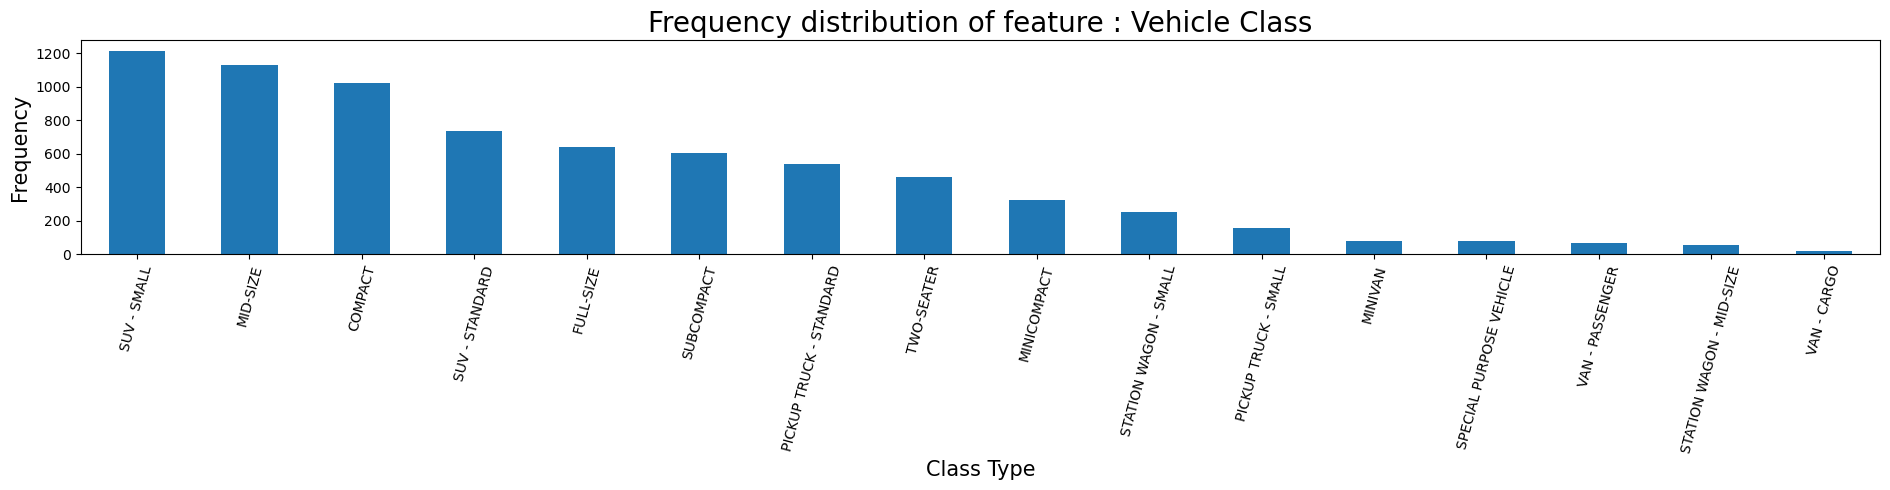

In [16]:
plt.figure(figsize=(19,5));
emissions.groupby("vehicle_class")["vehicle_class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Class Type", fontsize=15)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [17]:
plt.figure(figsize=(19,5));
emissions.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Car makes (Top 20 Plotted)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
plt.figure(figsize=(19,5));
emissions.groupby("Model")["Model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature : Car models (Top 20 Plotted)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### So we see that Ford is the most popular make, Ford F-150's are the most popular model, and small SUV's are the most popular class.

# Vehicles and their emissions


#### First, we'll copy our dataframe to a new variable.

In [19]:
df = emissions.copy()
renamed_cols = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_cols, axis='columns', inplace=True)

#### Now we'll look more in-depth at the make with the highest CO2 emissions.

#### We'll first rank all vehicle makes from least to worst, in terms of CO2 emissions.

Text(0, 0.5, 'CO2 Emissions(g/km)')

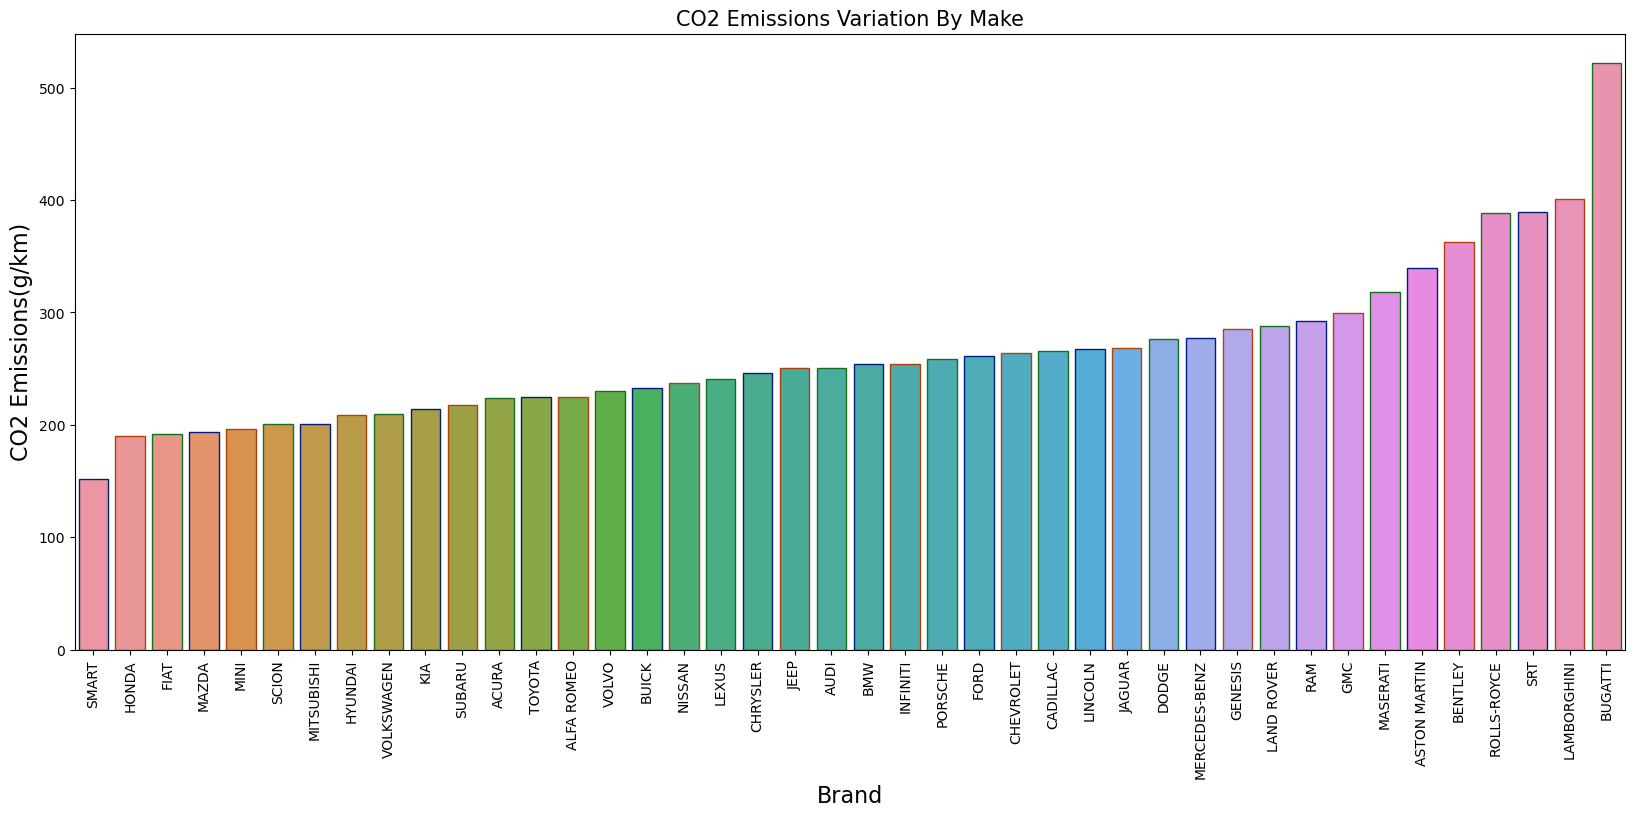

In [20]:
CO2_make = emissions.groupby(['Make'])['co2'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Make",y="co2",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions Variation By Make', fontsize=15)
plt.xlabel('Brand', fontsize=16)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=16)

#### Among our worst performers are Bugatti, Rolls-Royce, and Lamborghini; and among our best performers are Smart, Honda, and Fiat.

#### Next, we'll get a more detailed look at this same comparison by looking at the box plots for each make. This lets us take a look at the median emissions for each vehicle make as well as its interquartile range (IQR). And then we can compare that to the sample median of CO2 emissions across all vehicles (represented by the red dotted line.)

Box plot explained:
 - Each box has three lines: the top line represents the 75th percentile (Q3), the middle represents the 50th percentile (median), and the bottom represents the 25th percentile (Q1).
 - For the two lines outside of the box (called the 'whiskers'), the top is the max value and the bottom is the min value (excluding outliers).
 - IQR is the distance from the 75th percentile value and the 25th percentile value. IQR = Q3 - Q1.
 - The dots outside the max and min values represent outliers - values that are either (1.5 * IQR) greater than Q3 or (1.5 * IQR) less than Q1.


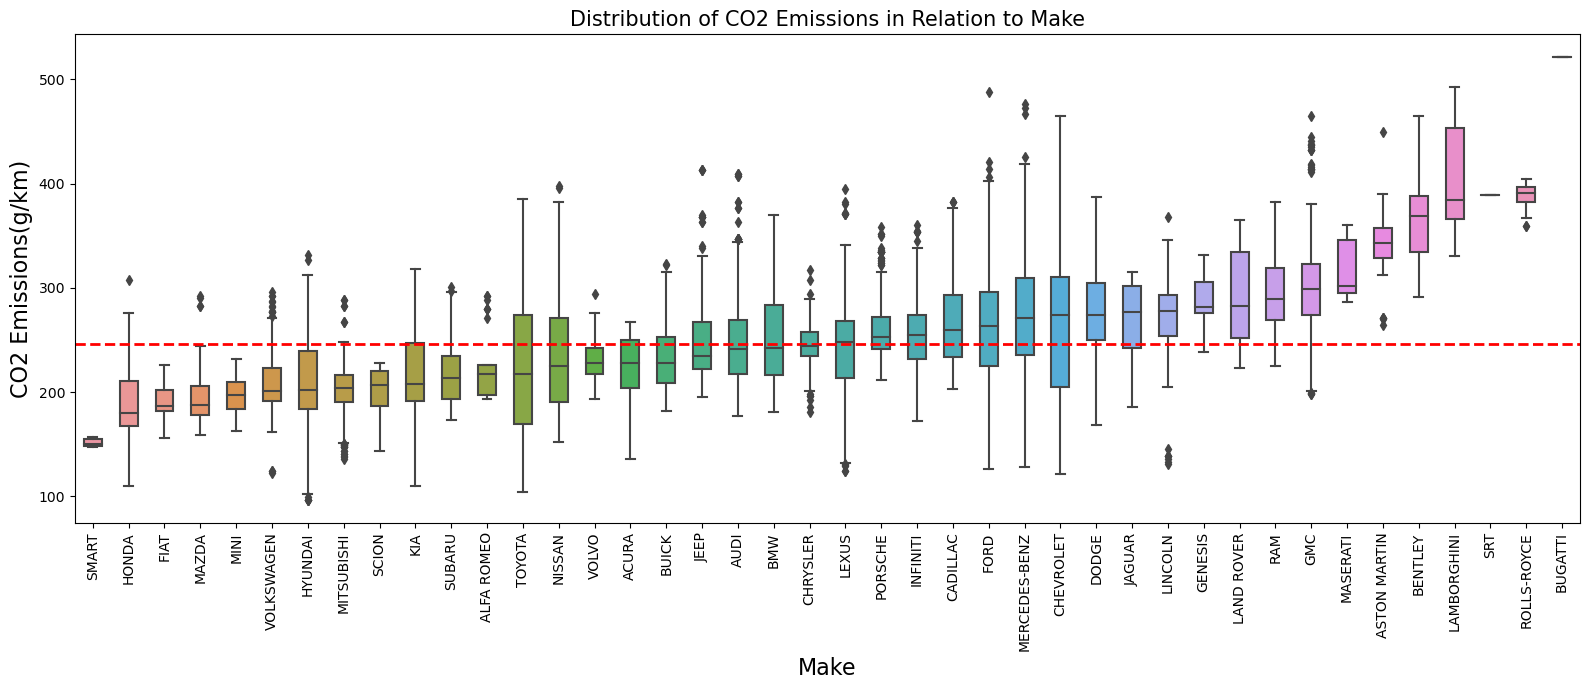

In [21]:
plt.figure(figsize=(16,7))
order = emissions.groupby("Make")["co2"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="co2", data=emissions, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in Relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=16)
plt.ylabel("CO2 Emissions(g/km)", fontsize=16)
plt.axhline(emissions["co2"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### Next, we'll do the same but compare vehicle classes by their CO2 emissions.

In [24]:
CO2_class = emissions.groupby(['vehicle_class'])['co2'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "vehicle_class",y="co2",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions Distribution By Vehicle Class', fontsize=15)
plt.xlabel('Vehicle Class', fontsize=16)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=16)

Text(0, 0.5, 'CO2 Emissions(g/km)')

#### And we'll again look at the box plots for each and compare each against the overall median emissions.

In [172]:
plt.figure(figsize=(16,7))
order = emissions.groupby("vehicle_class")["co2"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2", data=emissions, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in Relation to Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle class", fontsize=16)
plt.ylabel("CO2 Emissions(g/km)", fontsize=16)
plt.axhline(emissions["co2"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### We see that pickup trucks, SUVs (standard-sized), and vans are the vehicle classes that tend to do worst for emissions. 

# Looking at other features: transmission, number of cylinders, and fuel type.

#### First, we'll take a look at the transmissions in these cars.

In [25]:
transmission_distr = df['Transmission'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='Transmission', names='index')
fig.update_layout(title="Transmission Distribution")
fig.show()

#### 16% of cars have a manual transmission, with the rest being automatic in some way.

#### Next, we'll take a look at number of cylinders.

In [26]:
df.Cylinders.value_counts(normalize=True)[:5]

4     0.436019
6     0.331212
8     0.189844
12    0.020447
3     0.012864
Name: Cylinders, dtype: float64

#### 43.6% of all vehicles in our dataset have 4 cylinders. Followed by 6-cylinders at 33.1% and 8-cylinders at 19%.

In [27]:
fig = px.histogram(df, x="Cylinders")
fig.update_layout(title_text='Cylinders in Vehicles', xaxis_title="Cylinders", 
                  yaxis_title="Number_of_vehicles", title_x=0.5)
fig.show()

#### Next, we'll look at fuel types and see whether fuel consumption is higher in the city vs. the highway.

In [28]:
city = df.fuel_cons_city
highway = df.fuel_cons_hwy
city_hwy_df = df[['fuel_cons_city', 'fuel_cons_hwy', 'fuel_type', 'co2']]
city_hwy_df.head(10)

fuel_cons_city  fuel_cons_hwy         fuel_type  co2
0             9.9            6.7  Premium Gasoline  196
1            11.2            7.7  Premium Gasoline  221
2             6.0            5.8  Premium Gasoline  136
3            12.7            9.1  Premium Gasoline  255
4            12.1            8.7  Premium Gasoline  244
5            11.9            7.7  Premium Gasoline  230
6            11.8            8.1  Premium Gasoline  232
7            12.8            9.0  Premium Gasoline  255
8            13.4            9.5  Premium Gasoline  267
9            10.6            7.5  Premium Gasoline  212

In [29]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(2,1,1)
ax = plt.hist(city, color="orange", label="Fuel consumption, city", density=True, alpha=0.5)
ax = plt.hist(highway, color="blue", label="Fuel consumption, highway", density=True, alpha=0.5)
ax = plt.legend()
plt.show()

#### Fuel consumption on highways is higher (this can probably be explained by the fact that, although highway driving is typically more gas-efficient than city driving, the sheer amount of miles drivers put on the highway eclipse those savings).

#### Next, we'll look at the most common fuel types used on the highway and in the city.

<AxesSubplot:xlabel='fuel_cons_hwy', ylabel='Density'>

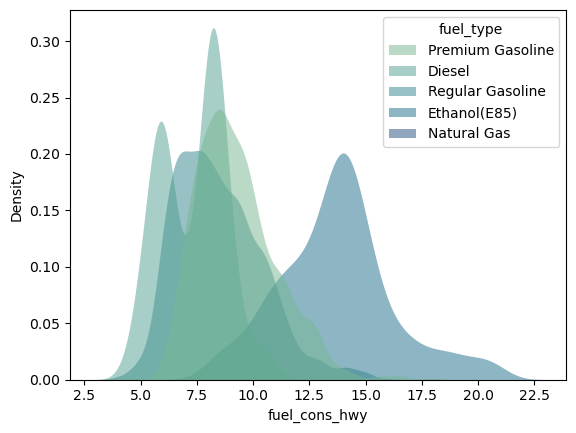

In [30]:
sns.kdeplot(
    data=city_hwy_df, x="fuel_cons_hwy", hue="fuel_type",
    fill=True, common_norm=False, palette="crest",
    alpha=0.5, linewidth=0
)

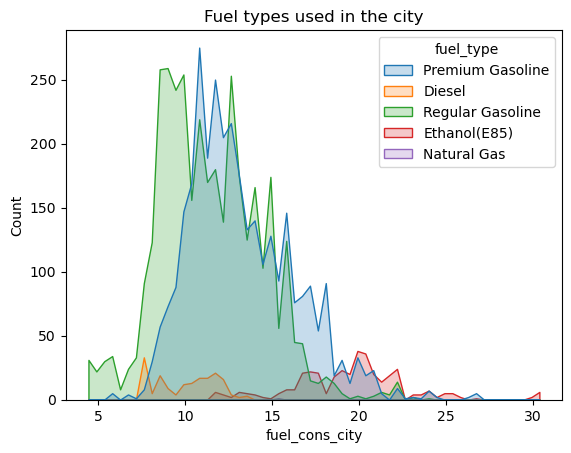

In [31]:
sns.histplot(city_hwy_df, x="fuel_cons_city", hue="fuel_type", element="poly")
plt.title('Fuel types used in the city')
plt.show()

#### The two most commonly used types of fuel are regular gasoline and premium gasoline, for both the city and the highway.

# Looking for relationships between emissions and other features

#### Now we'll move onto looking for which features of a vehicle are most strongly tied to CO2 emissions.
#### First, we'll examine engine size's relationship to CO2 emissions.

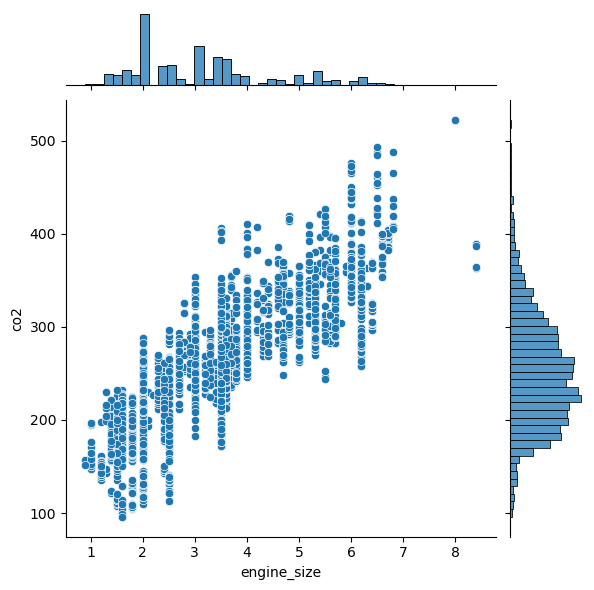

In [32]:
sns.jointplot(x=emissions['engine_size'], y=emissions['co2'], data=emissions)

#### Next, we'll look at number of cylinder's relationship to CO2 emissions.

<AxesSubplot:xlabel='Cylinders', ylabel='co2'>

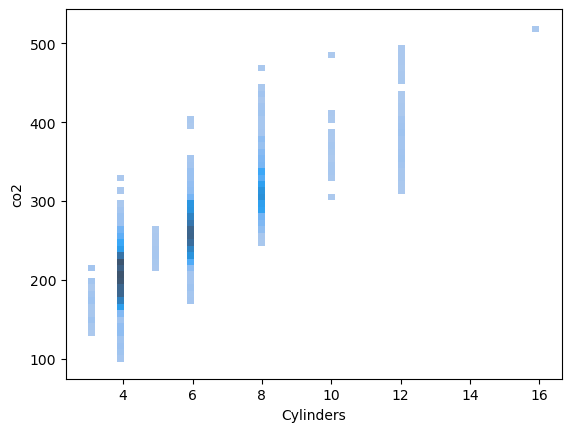

In [33]:
sns.histplot(df, x="Cylinders", y="co2")

#### And we can do the same for all the other numerical / non-categorical features in our data.

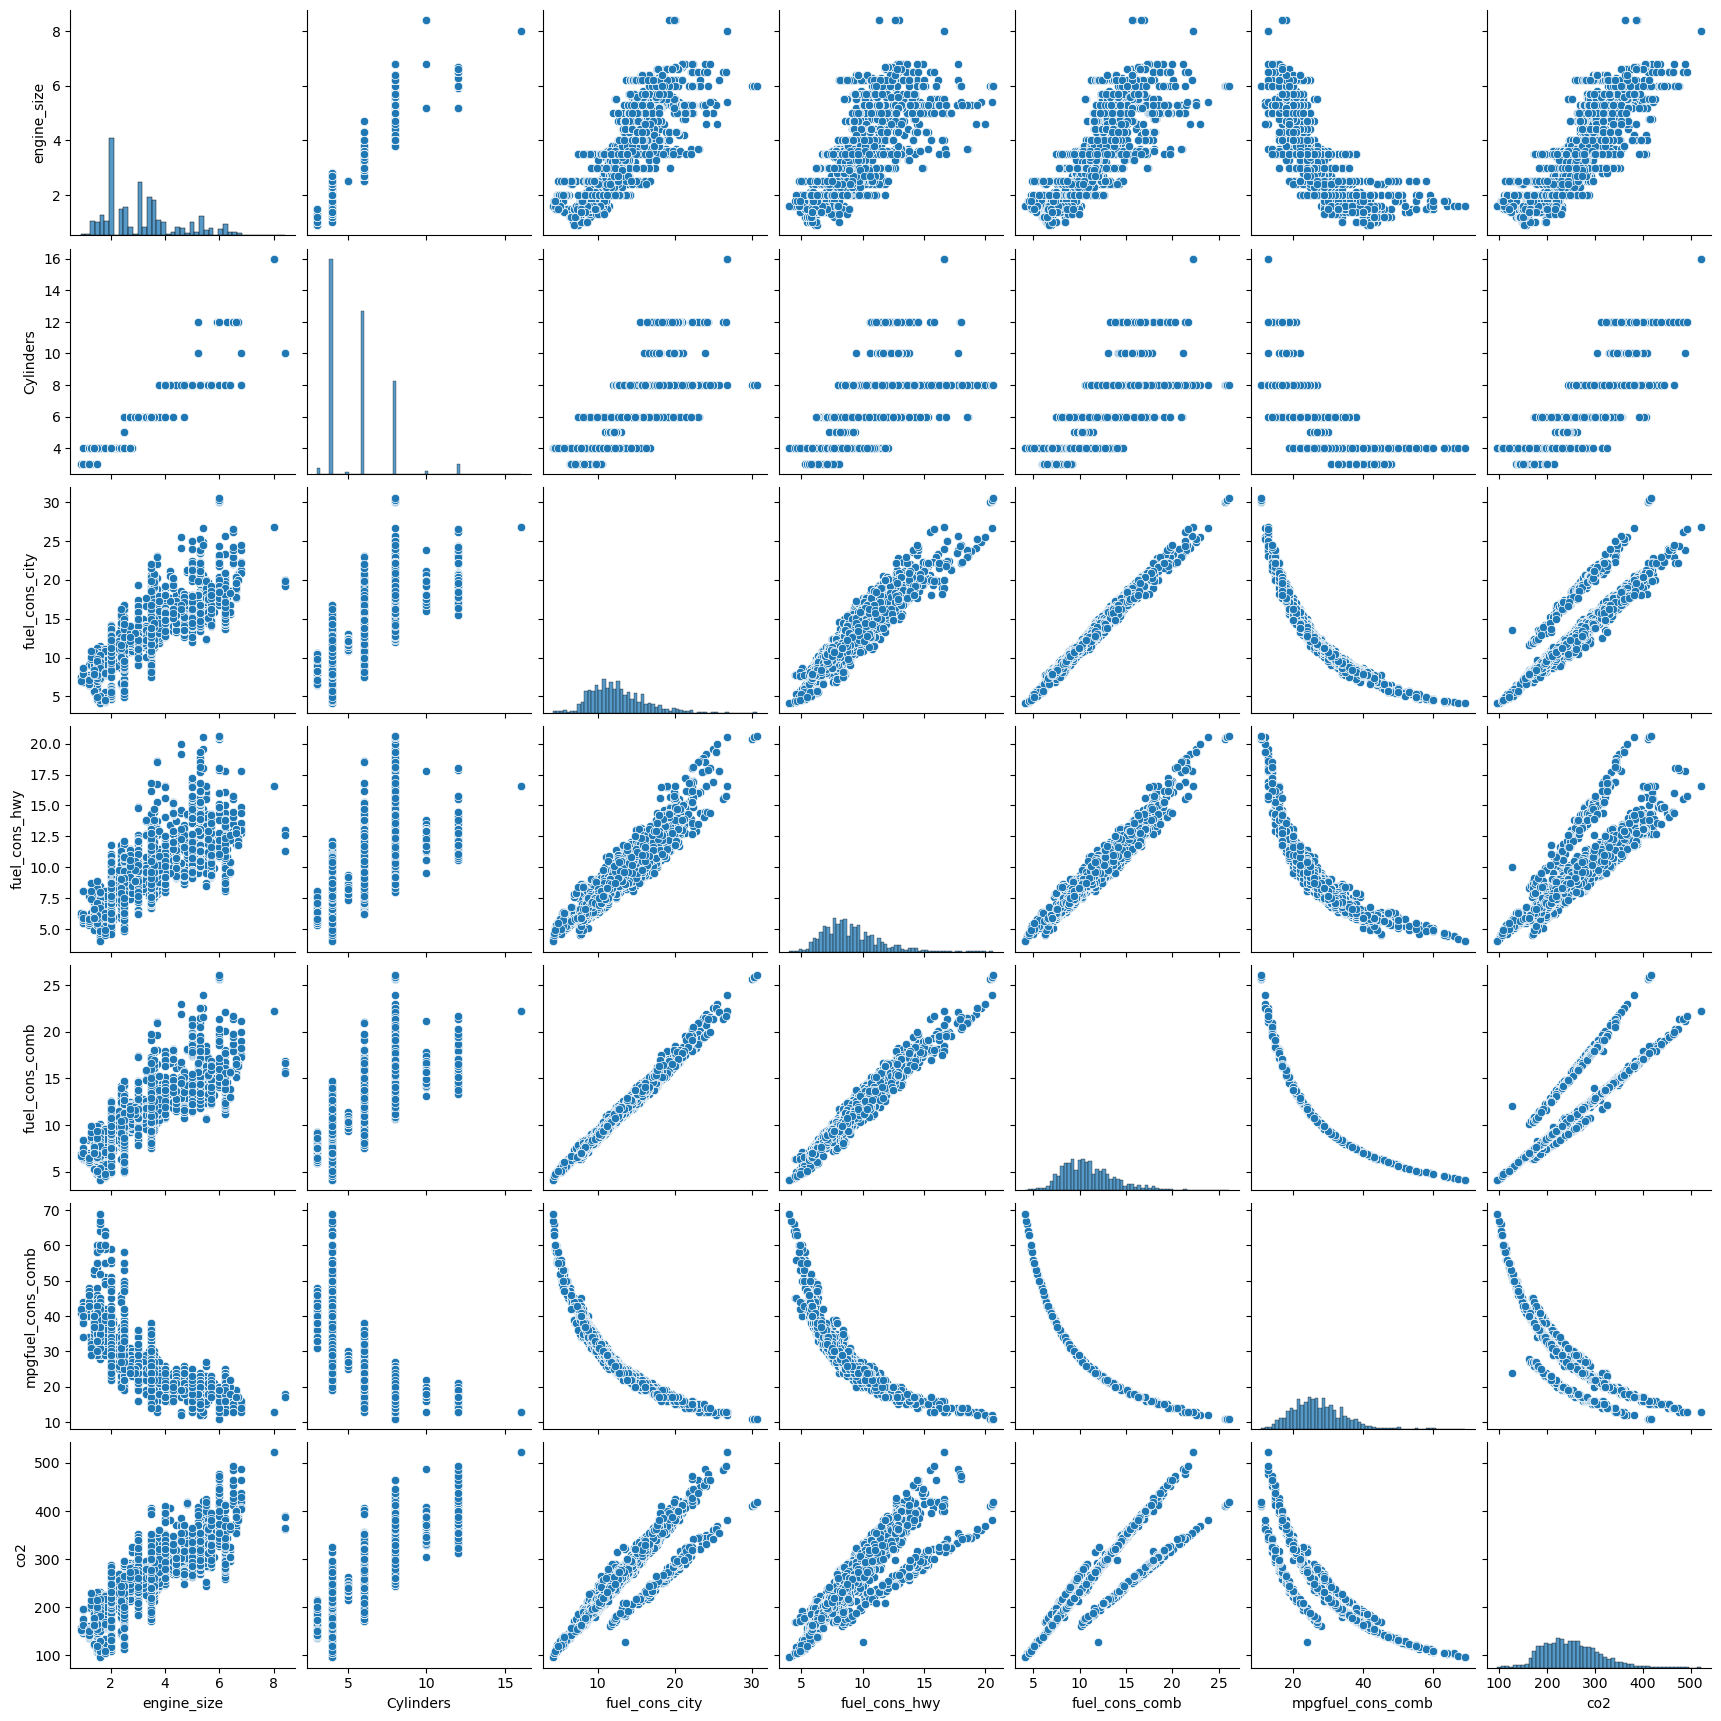

In [34]:
sns.pairplot(df)

#### Looking at either the bottom row or the rightmost column, we see that all features, with the exception of mpg, have a strong relationship with CO2 emissions.


#### Now let's find the actual correlation coefficient between these variables. This will help us identify which features will be the most influential and therefore the most useful of a predictor to be used in our regression model.

In [35]:
df.corr()

engine_size  Cylinders  fuel_cons_city  fuel_cons_hwy  \
engine_size           1.000000   0.927653        0.831379       0.761526   
Cylinders             0.927653   1.000000        0.800702       0.715252   
fuel_cons_city        0.831379   0.800702        1.000000       0.948180   
fuel_cons_hwy         0.761526   0.715252        0.948180       1.000000   
fuel_cons_comb        0.817060   0.780534        0.993810       0.977299   
mpgfuel_cons_comb    -0.757854  -0.719321       -0.927059      -0.890638   
co2                   0.851145   0.832644        0.919592       0.883536   

                   fuel_cons_comb  mpgfuel_cons_comb       co2  
engine_size              0.817060          -0.757854  0.851145  
Cylinders                0.780534          -0.719321  0.832644  
fuel_cons_city           0.993810          -0.927059  0.919592  
fuel_cons_hwy            0.977299          -0.890638  0.883536  
fuel_cons_comb           1.000000          -0.925576  0.918052  
mpgfuel_cons_comb       -0.925576           1.000000 -0.907426  
co2                      0.918052          -0.907426  1.000000

#### Displaying this table as a heatmap can help us more easily see these values.

In [36]:
cor = df.corr()
sns.heatmap(cor, annot=True)

<AxesSubplot:>

#### We see that most of our features (that are numerical, and with the exception of mpg rating) are strongly correlated with CO2 emissions. Next, we'll run a simple linear regression to see how accurately we can predict CO2 emissions based on one of these features. We'll choose number of cylinders as that feature.

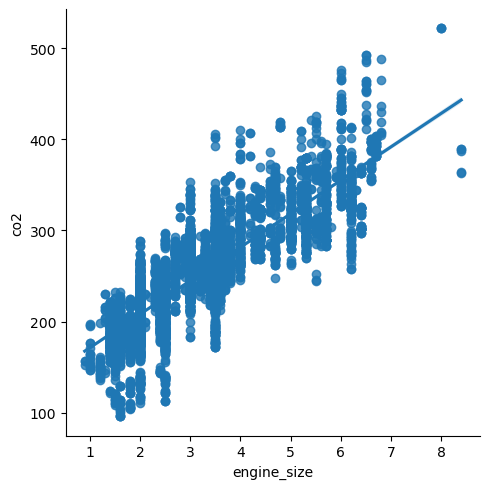

In [37]:
sns.lmplot(data=emissions, x='engine_size', y='co2')

#### Now we'll start using our regression model to make predictions.

# Simple Linear Regression

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
from sklearn import metrics

In [212]:
slr = LinearRegression()

In [213]:
y_col = "co2"
X = df.drop(y_col, axis=1)
y = df[y_col]

In [214]:
X = df[['engine_size']]

#### We'll split the data into a training set and a test set.

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)

In [216]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [217]:
slr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = slr.predict(X_test_s)
y_pred

array([207.81353106, 226.34096518, 281.92326755, ..., 356.03300405,
       318.9781358 , 207.81353106])

#### After training our simple linear regression model, we'll look at its R^2 score and other metrics to evaluate the model's performance.

#### What is R^2?
- The R^2 score is the coefficient of determination, and it tells us how well a regression model explains observed data, or how well a model fits the data. The highest possible score for R^2 is 1.0. Higher is better, and we would like our R^2 to be as close to 1.0 as possible.


#### Besides R^2, we also have other metrics for evaluating a regression model: MAE, MSE, and RMSE. Lower is better for these values.
 - A residual is the distance between a predicted data point and the actual observed data point.
 - Mean absolute error (MAE) is the average of the absolute distance between the real data and the predicted data; it measures the average of the residuals.
 - Mean squared error (MSE) is the average squared distance between the real data and the predicted data; it measures the variance of the residuals.
 - Root mean squared error (RMSE) is the square root of the MSE; it measures the standard deviation of the residuals.


In [235]:
print(f'R2 score: {r2_score(y_pred, y_test)}')

R2 score: 0.6442253628790717


In [234]:
print('Mean absolute error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error (MAE): 22.691334614468374
Mean squared error (MSE): 895.558574550554
Root mean squared error (RMSE): 29.92588469119257


#### We see our simple linear regression model's prediction has an accuracy of 64%. This is the result of trying to predict CO2 emissions using one feature, engine size, as our predictor.

#### We want to improve our accuracy, so we will try using more features in a multiple linear regression model.
 - The two additional features we'll choose will be number of cylinders and combined fuel consumption.

# Multiple linear regression

In [222]:
mlr = LinearRegression()
X = df[['engine_size', 'Cylinders', 'fuel_cons_comb']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)

X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

#### After running this model, we'll again look at its R^2 score and other metrics.

In [236]:
print(f'R2 score: {r2_score(y_pred_sm, y_test)}')

R2 score: 0.8589826263801745


In [233]:
print('Mean absolute error (MAE):', metrics.mean_absolute_error(y_test, y_pred_sm))
print('Mean squared error (MSE):', metrics.mean_squared_error(y_test, y_pred_sm))
print('Root mean squared error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sm)))

Mean absolute error (MAE): 13.148652560230877
Mean squared error (MSE): 421.1490154902305
Root mean squared error (RMSE): 20.521915492717305


#### The R^2 score is much higher than the previous, it is now 86%.

#### Our other three metrics are also better across the board.
 - The MAE dropped from 22.69 to 13.15
 - The MSE dropped from 895.56 to 421.15
 - The RMSE dropped from 29.93 to 20.52

# Conclusion

#### Summary of findings from the data analysis:

- The most popular vehicle models are the Ford F-150 followed by the Ford Mustang.
- The most popular vehicle makes are Ford, Chevrolet, and BMW.
- The most popular vehicle classes are small SUVs and mid-size sedans.
- Car makes with the least CO2 emissions are Smart, Honda, and Fiat.
- Car makes with the most CO2 emissions are Bugatti, Rolls-Royce, (Dodge) SRT, and Lamborghini.
- Vehicle classes with the least emissions are small station wagons and compacts.
- Vehicle classes with the most emissions are cargo vans and passenger vans.
- 43.6% of vehicles have 4 cylinders, 33.1% have 6 cylinders, and 19% have 8 cylinders.
- 16% of cars have a manual transmission.
- The most used fuel types are regular gasoline and premium gasoline.
- The features of a car most strongly associated with CO2 emissions are engine size, number of cylinders, and fuel consumption.

#### Summary of results from our predictions:
- Our simple linear regression model used engine size to predict CO2 emission levels. This model achieved a 64% accuracy in its prediction.
- Our multiple linear regression model used engine size, number of cylinders, and combined fuel consumption to predict CO2 emission levels. This model achieved an 86% accuracy in its prediction.
